# Analisi dati

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("/Users/mattia/Desktop/PLACES/address.csv",delimiter="\t",usecols=['placeName', 'placeTags',
       'numPeopleVisited', 'numPeopleWant', 'placeDesc', 'placeShortDesc',
       'placeNearby', 'placeAddress', 'placeAlt', 'placeLong', 'createdby',
       'placeEditors', 'placePubDate', 'placeRelatedLists',
       'placeRelatedPlaces', 'placeURL', 'Address', 'City', 'State'])

## Quanti luoghi interessanti ha uno stato

In [4]:
stati=df.groupby("State")['numPeopleVisited', 'numPeopleWant'].count()

/var/folders/j4/9fk3st2d30g22vff83pj6cnw0000gn/T/ipykernel_9991/2615976009.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  stati=df.groupby("State")['numPeopleVisited', 'numPeopleWant'].count()


In [5]:
stati_frequenti=stati.numPeopleVisited.sort_values(ascending=False)

In [18]:
pd.DataFrame(stati_frequenti).to_csv("/Users/mattia/desktop/PLACES/luoghi.csv")

## Quante volte uno stato è stato visitato

In [25]:
stati=df.groupby("State")['numPeopleVisited', 'numPeopleWant'].sum()
pd.DataFrame(stati.numPeopleVisited.sort_values(ascending=False)).to_csv("/Users/mattia/desktop/PLACES/luoghiVIS.csv")
stati.numPeopleVisited.sort_values(ascending=False)

/var/folders/j4/9fk3st2d30g22vff83pj6cnw0000gn/T/ipykernel_9991/2544391978.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



State
United States     2010859
United Kingdom     245208
France              86528
Italy               80088
Germany             71614
                   ...   
Tanzania               49
Madagascar             47
Kazakhstan             39
Yemen                  31
Venezuela              18
Name: numPeopleVisited, Length: 94, dtype: int64

## Primi 20 luoghi più visitati

In [8]:
indici=df.numPeopleVisited.sort_values(ascending=False).index

In [12]:
first_twenty=df[df.index.isin(indici)][0:20]

In [27]:
pd.DataFrame(first_twenty.groupby("State")["numPeopleVisited"].count().sort_values(ascending=False)).to_csv("/Users/mattia/desktop/PLACES/luoghi20.csv")
first_twenty.groupby("State")["numPeopleVisited"].count().sort_values(ascending=False)

State
United States     14
United Kingdom     5
France             1
Name: numPeopleVisited, dtype: int64

## Mappa primi 20 luoghi

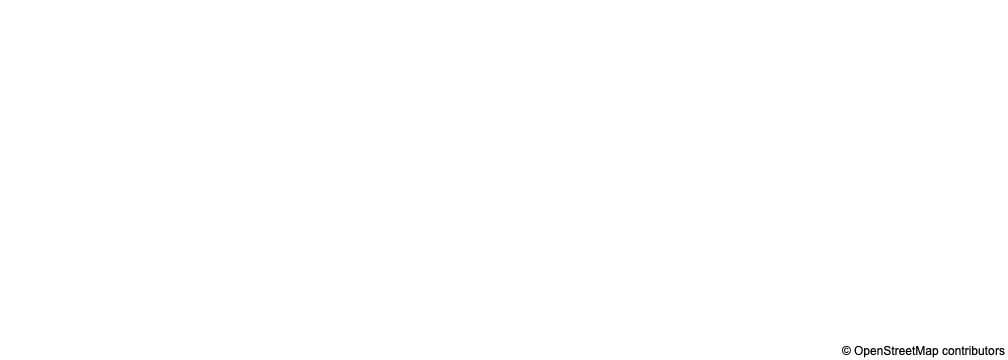

In [16]:
import plotly.express as px
import geopandas as gpd


fig = px.scatter_mapbox(first_twenty,
                        lat=first_twenty.placeAlt,
                        lon=first_twenty.placeLong,
                        hover_name=first_twenty.placeName,
                        hover_data=[first_twenty.numPeopleVisited,first_twenty.Address,first_twenty.City,first_twenty.State],
                        labels={'numPeopleVisited':'Number of visit',"placeAlt":"Latitude","placeLong":"Longitude"},
                        zoom=1)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()